In [9]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.78748826019992


Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's
:Number of Instances: 506 

:Number of Attributes: 13 numeric/categorical predictive

:Median Value (attribute 14) is usually the target


In [5]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [6]:
# Splitting data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
train=pd.DataFrame(X_train,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRAITO','B','LSTAT'])
train['price']=Y_train
train.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAITO,B,LSTAT,price
147,-0.113818,-0.487722,-0.180458,-0.272599,-0.092387,-1.868631,-1.094373,-0.606401,-0.637962,-0.619094,-0.025677,-0.068243,-0.001831,16.1
324,-0.408334,1.229060,-0.689681,3.668398,-0.930305,1.399536,-0.696095,0.471641,-0.637962,-0.916058,-0.395567,0.357175,-0.925576,33.2
65,-0.092533,-0.487722,1.015999,-0.272599,-0.196047,-0.744576,-1.005472,0.144159,1.661245,1.530926,0.806576,0.397414,-0.313017,21.8
113,-0.407130,-0.487722,-1.203282,-0.272599,-0.947582,-0.173287,0.036453,-0.142536,-0.867883,-0.785394,-0.210622,0.385463,-0.184057,21.4
259,-0.413289,1.229060,-1.442573,-0.272599,-1.085795,0.292576,-0.859673,2.375447,-0.982843,-0.434976,0.575395,0.441052,-0.935389,22.9


# SGD Regressor as per SKLEARN

In [7]:
def sklearn_SGD(x_train,x_test,y_train,y_test,alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    
    #scatter plot
    print('\n This is Scikit learn SGD with number of iterations = ',n_iter)
    plt.scatter(y_test,y_pred)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
    
    #kdeplot
    
       
    sgd_error=mean_squared_error(y_test,y_pred)
    print('mean sq error=', sgd_error)
    #print('number of iteration=', n_iter)
    
    return clf.coef_, clf.intercept_, sgd_error


 This is Scikit learn SGD with number of iterations =  1


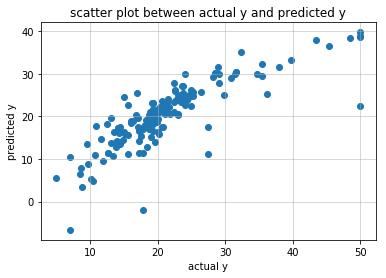

***********************************************************
mean sq error= 24.0933470143612


In [10]:
m_sgd,c_sgd,error_sgd=sklearn_SGD(X_train,X_test,Y_train,Y_test,alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1)

# Manual SGD

In [18]:
def man_sgd(X_train,X_test,Y_test,lr_rate_var,alpha=0.0001,lr_rate=0.01,itera=1000,pow_t=0.25):
    m_new=np.zeros(shape=(1,13))#Slope
    c_new=0#Intercept
    r=lr_rate
    for i in range(itera):
        m_old=m_new
        c_old=c_new
        m_in=np.zeros(shape=(1,13))
        c_in=0
        x_batch=X_train.sample(10)
        x=np.array(x_batch.drop('price',axis=1))
        y=np.array(x_batch['price'])
        #Calculating Derivatives with respect to slope and Intercept
        for k in range(10):
            y_old=np.dot(m_old,x[k])+c_old
            m_in+=x[k] * (y[k]-y_old)
            c_in+=(y[k]-y_old)
            
        m_in*=(-2/x.shape[0])
        c_in*=(-2/x.shape[0])
        #Calculating New Slope and Intercet
        m_new=m_old-(r * m_in)
        c_new=c_old-(r * c_in)
        #This block of code will come into picture if learnin rate variance is " invscaling "
        if(lr_rate_var=='change'):
            lr_rate=lr_rate/pow(i,pow_t)
        
    #Predicting Y using above calculated m and c with linear equation y=mx+c
    y_pred=[]
    y_test=np.array(X_train['price'])
    #y_in
    for n in range(len(X_test)):
        y_in=np.asscalar(np.dot(m_new , X_test[n])+c_new)
        y_pred.append(y_in)
    y_pred=np.array(y_pred)
    y_pred[np.isnan(y_pred)]=np.median(y_pred[~np.isnan(y_pred)])
    
    mse=mean_squared_error(y_pred,Y_test)
    
    #scatter plot
    print('\n This is Manual SGD with number of iterations = ',itera)
    plt.scatter(Y_test,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    print('**************************************************************')
    print('Mean Squared error : ',mse)
    
    return m_new,c_new,mse



 This is Manual SGD with number of iterations =  100


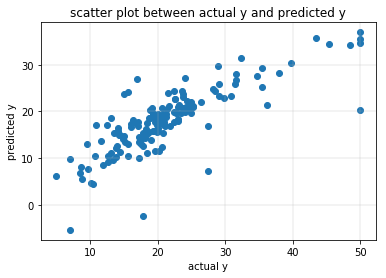

**************************************************************
Mean Squared error :  35.82267979351758


In [19]:
m,c,manual_error=man_sgd(train,X_test,Y_test,lr_rate_var='Constant',itera=100)

Now we will find out how the manual and sklearn SGD's will work with number of iterations increase from 1 to 10000 in multiples of 10
We calculate how much slope(m) of each column is differ in between manual and scikit learn models and also calculate the same between intercept(c)

# n_iter=1 and learning_rate_change=constant


 This is Scikit learn SGD with number of iterations =  1


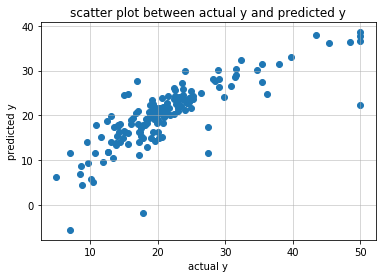

***********************************************************
mean sq error= 25.903499082797932

 This is Manual SGD with number of iterations =  1


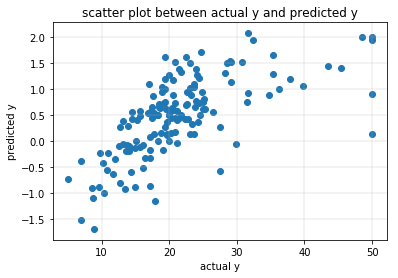

**************************************************************
Mean Squared error :  504.4639602415928

 Number of iterations =  1
number of points more than 30% in percent= 12
sklearn sgd intercept= [21.62897794]
manual sgd intercept= [0.5472]


In [21]:
m_num=[]
c_diff=[]
n=1
#for n in [1,10,100,1000,10000]:
#Scikit learn SGD
m_sgd,c_sgd,error_sgd=sklearn_SGD(X_train,X_test,Y_train,Y_test,alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=n)
# Manual SGD
m,c,manual_error=man_sgd(train,X_test,Y_test,lr_rate_var='Constant',itera=n)
    
print('\n Number of iterations = ',n)
    
#Calculating Percentage difference of each column slope
percent=abs((m_sgd-m)/m)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
m_num.append(cnt)
print('number of points more than 30% in percent=',cnt)
    
#Calculating Slope difference
print('sklearn sgd intercept=',c_sgd)
print('manual sgd intercept=',c)
c_diff.append(abs(c_sgd-c))
    
    

# n_iter=10 and learning_rate_change=constant


 This is Scikit learn SGD with number of iterations =  10


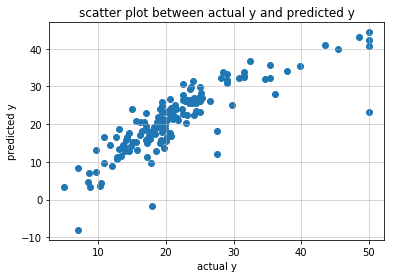

***********************************************************
mean sq error= 22.958859684234803

 This is Manual SGD with number of iterations =  10


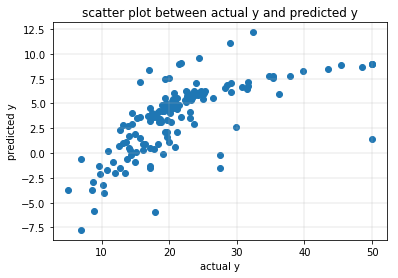

**************************************************************
Mean Squared error :  359.22370171209286

 Number of iterations =  10
number of points more than 30% in percent= 13
sklearn sgd intercept= [22.50985116]
manual sgd intercept= [4.05159844]


In [22]:
n=10
#for n in [1,10,100,1000,10000]:
#Scikit learn SGD
m_sgd,c_sgd,error_sgd=sklearn_SGD(X_train,X_test,Y_train,Y_test,alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=n)
# Manual SGD
m,c,manual_error=man_sgd(train,X_test,Y_test,lr_rate_var='Constant',itera=n)
    
print('\n Number of iterations = ',n)
    
#Calculating Percentage difference of each column slope
percent=abs((m_sgd-m)/m)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
m_num.append(cnt)
print('number of points more than 30% in percent=',cnt)
    
#Calculating Slope difference
print('sklearn sgd intercept=',c_sgd)
print('manual sgd intercept=',c)
c_diff.append(abs(c_sgd-c))


# n_iter=100 and learning_rate_change=constant


 This is Scikit learn SGD with number of iterations =  100


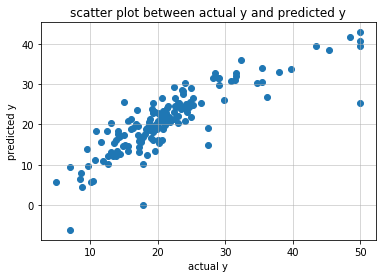

***********************************************************
mean sq error= 21.073967404904913

 This is Manual SGD with number of iterations =  100


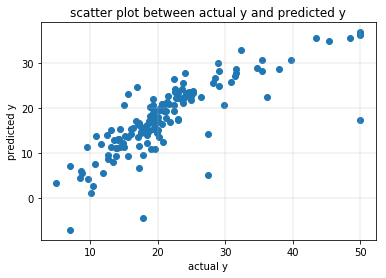

**************************************************************
Mean Squared error :  36.340045770382055

 Number of iterations =  100
number of points more than 30% in percent= 11
sklearn sgd intercept= [22.30106399]
manual sgd intercept= [19.36336143]


In [23]:
n=100
#for n in [1,10,100,1000,10000]:
#Scikit learn SGD
m_sgd,c_sgd,error_sgd=sklearn_SGD(X_train,X_test,Y_train,Y_test,alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=n)
# Manual SGD
m,c,manual_error=man_sgd(train,X_test,Y_test,lr_rate_var='Constant',itera=n)
    
print('\n Number of iterations = ',n)
    
#Calculating Percentage difference of each column slope
percent=abs((m_sgd-m)/m)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
m_num.append(cnt)
print('number of points more than 30% in percent=',cnt)
    
#Calculating Slope difference
print('sklearn sgd intercept=',c_sgd)
print('manual sgd intercept=',c)
c_diff.append(abs(c_sgd-c))


# n_iter=1000 and learning_rate_change=constant


 This is Scikit learn SGD with number of iterations =  1000


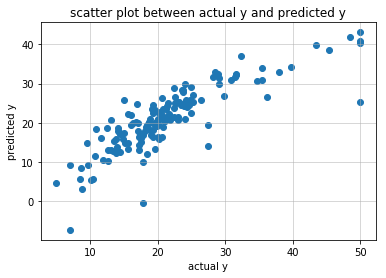

***********************************************************
mean sq error= 21.948939710007416

 This is Manual SGD with number of iterations =  1000


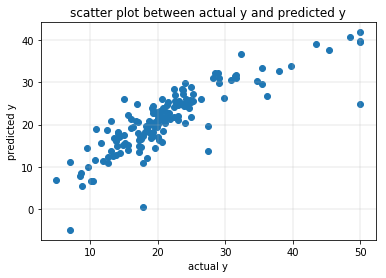

**************************************************************
Mean Squared error :  21.621898607008497

 Number of iterations =  1000
number of points more than 30% in percent= 5
sklearn sgd intercept= [22.45911309]
manual sgd intercept= [22.53736229]


In [26]:
n=1000
#for n in [1,10,100,1000,10000]:
#Scikit learn SGD
m_sgd,c_sgd,error_sgd=sklearn_SGD(X_train,X_test,Y_train,Y_test,alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=n)
# Manual SGD
m,c,manual_error=man_sgd(train,X_test,Y_test,lr_rate_var='Constant',itera=n)
    
print('\n Number of iterations = ',n)
    
#Calculating Percentage difference of each column slope
percent=abs((m_sgd-m)/m)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
m_num.append(cnt)
print('number of points more than 30% in percent=',cnt)
    
#Calculating Slope difference
print('sklearn sgd intercept=',c_sgd)
print('manual sgd intercept=',c)
c_diff.append(abs(c_sgd-c))


# n_iter=10000 and learning_rate_change=constant


 This is Scikit learn SGD with number of iterations =  10000


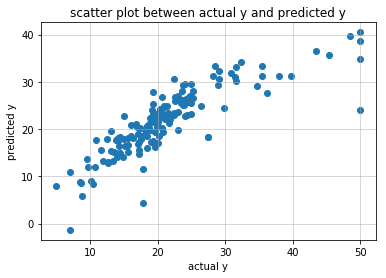

***********************************************************
mean sq error= 21.357323976231974

 This is Manual SGD with number of iterations =  10000


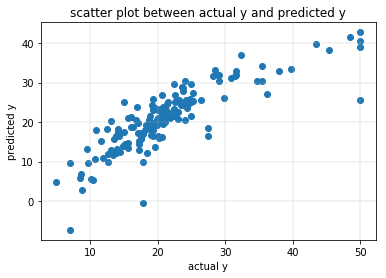

**************************************************************
Mean Squared error :  21.85667630125613

 Number of iterations =  10000
number of points more than 30% in percent= 4
sklearn sgd intercept= [22.66622336]
manual sgd intercept= [22.39727028]


In [25]:
n=10000
#for n in [1,10,100,1000,10000]:
#Scikit learn SGD
m_sgd,c_sgd,error_sgd=sklearn_SGD(X_train,X_test,Y_train,Y_test,alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=n)
# Manual SGD
m,c,manual_error=man_sgd(train,X_test,Y_test,lr_rate_var='Constant',itera=n)
    
print('\n Number of iterations = ',n)
    
#Calculating Percentage difference of each column slope
percent=abs((m_sgd-m)/m)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
m_num.append(cnt)
print('number of points more than 30% in percent=',cnt)
    
#Calculating Slope difference
print('sklearn sgd intercept=',c_sgd)
print('manual sgd intercept=',c)
c_diff.append(abs(c_sgd-c))


From above observations we can consider number of iterations as 1000 is best as it matched nearly with scikit learn SGD Regressor function.
So, now calculate/plot the weight/slope difference between both manual and built in functions outputs 

In [28]:
df=pd.DataFrame(data=[m_sgd,m[0]],index=['weights_sklearn','Weights_scratch'])
df.T

,weights_sklearn,Weights_scratch
0,-1.294348,-0.921739
1,0.949204,0.769518
2,0.417016,0.256340
3,0.966018,0.973653
4,-1.512194,-1.606552
5,3.024781,2.919984
6,-0.392285,-0.574962
7,-2.936975,-3.162996
8,2.348335,1.515762
9,-1.422644,-0.848785


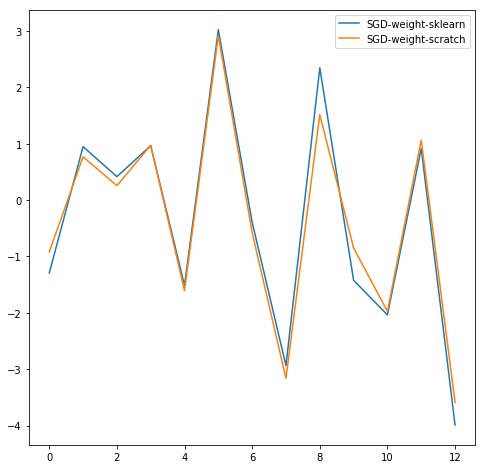

In [29]:
plt.figure(figsize=(8,8))
plt.plot(m_sgd,label="SGD-weight-sklearn")
plt.plot(m[0],label="SGD-weight-scratch")
plt.legend()

In [35]:
import tabulate
table1 = [['n_iter', 'no. of points>30% in w', 'difference in intercept'],
         [1,m_num[0], c_diff[0]], 
         [10, m_num[1], c_diff[1]],
         [100, m_num[2], c_diff[2]],
         [1000, m_num[3], c_diff[3]],
         [10000, m_num[4], c_diff[4]]]
print(tabulate.tabulate(table1, tablefmt='fancy_grid'))

╒════════╤════════════════════════╤═════════════════════════╕
│ n_iter │ no. of points>30% in w │ difference in intercept │
├────────┼────────────────────────┼─────────────────────────┤
│ 1      │ 12                     │ [21.08177794]           │
├────────┼────────────────────────┼─────────────────────────┤
│ 10     │ 13                     │ [18.45825271]           │
├────────┼────────────────────────┼─────────────────────────┤
│ 100    │ 11                     │ [2.93770256]            │
├────────┼────────────────────────┼─────────────────────────┤
│ 1000   │ 2                      │ [0.14084553]            │
├────────┼────────────────────────┼─────────────────────────┤
│ 10000  │ 4                      │ [0.26895308]            │
╘════════╧════════════════════════╧═════════════════════════╛


# Observation-
we have fixed learning rate and lr_rate_variation, and only changing n_iter

as we can see , by increasing manual sgd. n_iter , error reducing.

with increase in iteration the number of element manual sgd weight and SGDRegressor weight is going to be more similar

with increasing the iteration number the intercept value also coming closer